<a href="https://colab.research.google.com/github/RareDiseaseData/Meta-analysis-data/blob/main/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
df = pd.read_csv("/content/Hyl_Patient_data.csv")
df

,ID,Author,Year,Title,Cell1,Cell2,Age,Sex,Type,n,...,Method,Control vs patient vs aggregate,Measurement,%hydroxylysine_ind,%hydroxylysine_per_n1,%hydoxylation_per_n2,STD_n1,STD_n2,STD simulated from regression,STD combined
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,1.0,...,1,1,1,0.465116,NaN,NaN,NaN,NaN,0.093500,NaN
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,1.0,...,2,1,1,0.219020,NaN,NaN,NaN,NaN,0.083326,NaN
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,3.0,...,5,1,1,0.218750,0.314373,0.314373,0.00587,0.00587,NaN,NaN
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,...,3,1,1,0.371429,NaN,NaN,NaN,NaN,0.041000,NaN
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,...,3,1,1,0.352941,NaN,NaN,NaN,NaN,0.037900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.370504,NaN,NaN,NaN,NaN,0.044100,NaN
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.412710,NaN,NaN,NaN,NaN,0.051200,NaN
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.423261,NaN,NaN,NaN,NaN,0.053000,NaN
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.425180,NaN,NaN,NaN,NaN,0.053300,NaN


## Preprocessing

In [3]:
df.columns

Index(['ID', 'Author', 'Year', 'Title', 'Cell1', 'Cell2', 'Age', 'Sex', 'Type',
       'n', 'n2', 'Contains std', 'type of comparaison', 'Method',
       'Control vs patient vs aggregate', 'Measurement', '%hydroxylysine_ind',
       '%hydroxylysine_per_n1', '%hydoxylation_per_n2', 'STD_n1', 'STD_n2',
       'STD simulated from regression', 'STD combined'],
      dtype='object')

In [4]:
df_sel = df[[
    'ID',
    'Cell1', # 1 fibroblast or 2 bone 
    'Age', 
    'Sex', 
    'Type', # severity of the pain (not linear)
    'n', 
    'Method', # quemistry method used for the extraction
    '%hydroxylysine_ind', # outcome for ipd
    'STD_n1', # within study std
    'STD_n2' # within study std within type
  ]]
df_sel

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
0,6,2,2,1,9,1.0,1,0.465116,NaN,NaN
1,8,2,1,1,2,1.0,2,0.219020,NaN,NaN
2,15,1,1,2,2,3.0,5,0.218750,0.00587,0.00587
3,15,2,1,2,2,NaN,3,0.371429,NaN,NaN
4,15,2,1,2,2,NaN,3,0.352941,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
64,158,1,5,3,4,NaN,5,0.370504,NaN,NaN
65,158,1,5,3,4,NaN,5,0.412710,NaN,NaN
66,158,1,5,3,4,NaN,5,0.423261,NaN,NaN
67,158,1,5,3,4,NaN,5,0.425180,NaN,NaN


In [5]:
df_sel[df_sel.ID == 61] # aggregate; maybe something went wrong here

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
15,61,1,2,3,1,3.0,5,0.129901,0.008515,0.008515
16,61,1,1,3,2,5.0,5,0.260990,0.015050,0.015050
17,61,1,5,3,3,12.0,5,0.140198,0.020990,0.020990
18,61,1,5,3,4,3.0,5,0.121188,0.010495,0.010495
19,61,2,2,3,1,3.0,3,0.134257,0.010693,0.010693
20,61,2,1,3,2,5.0,3,0.271683,0.021782,0.021782
21,61,2,5,3,3,12.0,3,0.114455,0.016634,0.016634
22,61,2,5,3,4,3.0,3,0.152079,0.011881,0.011881


In [6]:
df_sel[df_sel.ID == 75] # Did not report the method, values significantly lower
df_sel.loc[df_sel.ID == 75, 'Method'] = -1
df_sel[df_sel.ID == 75]

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
24,75,1,3,3,9,3.0,-1,0.241,0.045,0.045
25,75,1,1,3,9,NaN,-1,0.196,NaN,NaN
26,75,1,4,3,9,NaN,-1,0.151,NaN,NaN


In [7]:
idx = df_sel.loc[(df_sel.ID == 61) | (df_sel.ID == 75)].index
df_priyesh_hipo = df_sel.drop(idx)
df_priyesh_hipo

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
0,6,2,2,1,9,1.0,1,0.465116,NaN,NaN
1,8,2,1,1,2,1.0,2,0.219020,NaN,NaN
2,15,1,1,2,2,3.0,5,0.218750,0.005870,0.005870
3,15,2,1,2,2,NaN,3,0.371429,NaN,NaN
4,15,2,1,2,2,NaN,3,0.352941,NaN,NaN
5,25,1,1,1,2,2.0,5,0.294000,0.009016,0.009016
6,25,2,1,1,2,NaN,3,0.281250,NaN,NaN
7,30,2,2,2,3,4.0,3,0.252078,0.027212,0.024183
8,30,2,2,1,4,NaN,3,0.259669,NaN,0.016998
9,30,2,2,1,4,NaN,3,0.217877,NaN,NaN


## Roadmap

In [ ]:
"""
- [x] Empirical distribution (https://machinelearningmastery.com/empirical-distribution-function-in-python/)

##############################

- [ ] Check distribution of each column (normal, Bernoulli (maybe others))
- [ ] Generate data based on those distributions 🙂

##############################

- [ ] Statistical test for normality

- [ ] Get mean and std if normal and simulate data from those values

- [ ] Oversampling methods (SMOTE)

- [ ] Clusters or Groups

  - [ ] Apply some techniques for simulate data from above
"""

## Base dataframe

In [32]:
df_final = df_priyesh_hipo[[
  'ID',
  'Cell1',
  'Age',
  'Sex',
  'Type',
  'Method',
  '%hydroxylysine_ind'
]]
df_final

,ID,Cell1,Age,Sex,Type,Method,%hydroxylysine_ind
0,6,2,2,1,9,1,0.465116
1,8,2,1,1,2,2,0.219020
2,15,1,1,2,2,5,0.218750
3,15,2,1,2,2,3,0.371429
4,15,2,1,2,2,3,0.352941
5,25,1,1,1,2,5,0.294000
6,25,2,1,1,2,3,0.281250
7,30,2,2,2,3,3,0.252078
8,30,2,2,1,4,3,0.259669
9,30,2,2,1,4,3,0.217877


## Empirical simulation

### Unit test

In [15]:
df_final['ID'].value_counts()

158    39
30      4
15      3
25      2
6       1
8       1
32      1
36      1
46      1
55      1
71      1
82      1
85      1
144     1
Name: ID, dtype: int64

In [42]:
df_final['ID'].value_counts() / sum(df_final['ID'].value_counts())

158    0.672414
30     0.068966
15     0.051724
25     0.034483
6      0.017241
8      0.017241
32     0.017241
36     0.017241
46     0.017241
55     0.017241
71     0.017241
82     0.017241
85     0.017241
144    0.017241
Name: ID, dtype: float64

In [57]:
df_final['ID'].unique()

array([  6,   8,  15,  25,  30,  32,  36,  46,  55,  71,  82,  85, 144,
       158])

In [60]:
np.random.choice(  
  a = df_final['ID'].value_counts().index,
  size = 50,
  p = df_final['ID'].value_counts() / sum(df_final['ID'].value_counts())
)

array([ 30, 158, 158,  15, 158,  30, 158,  46,   8,  55, 158,  82, 158,
        25, 158, 144,   8, 158, 158,  85,  30, 158, 158, 158, 158, 158,
       144,  32,  25, 158, 158, 158, 158,  30, 158, 158,  30, 158, 158,
       158, 158,  85,  30, 158, 158,   8, 158, 158, 158,  71])

### Model

In [63]:
def empirical_simulator(df, col, n):
  df[col].value_counts()
  simulated_data = np.random.choice(  
    a = df[c].value_counts().index,
    size = n,
    p = df[c].value_counts() / sum(df[c].value_counts())
  )
  return simulated_data

### Simulated data

In [64]:
new_data = {}
for c in df_final.columns:
  new_data[c] = empirical_simulator(df_final, c, 1000)
df_empirical_simulated = pd.DataFrame(new_data)

### Visualization

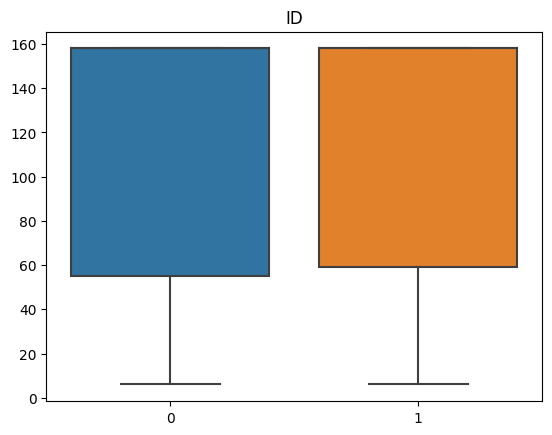

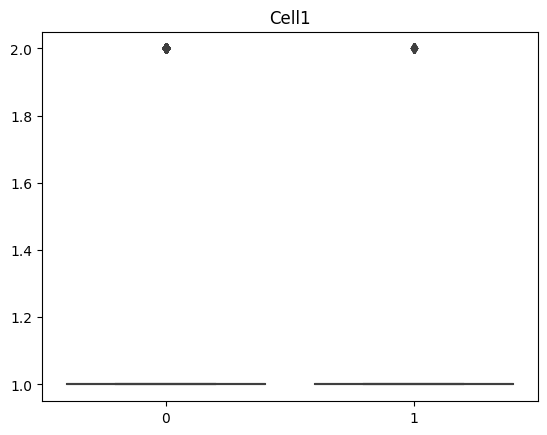

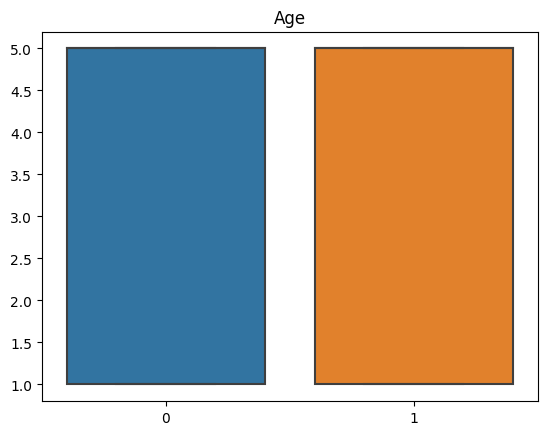

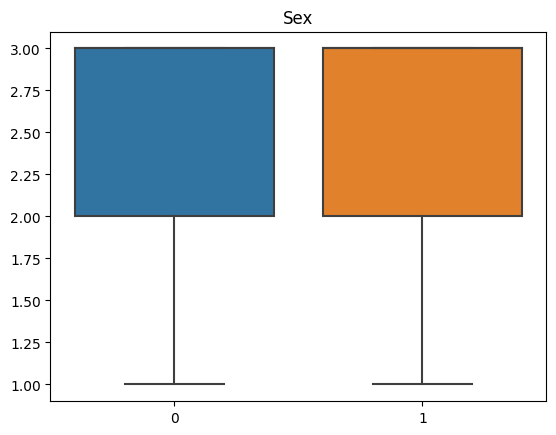

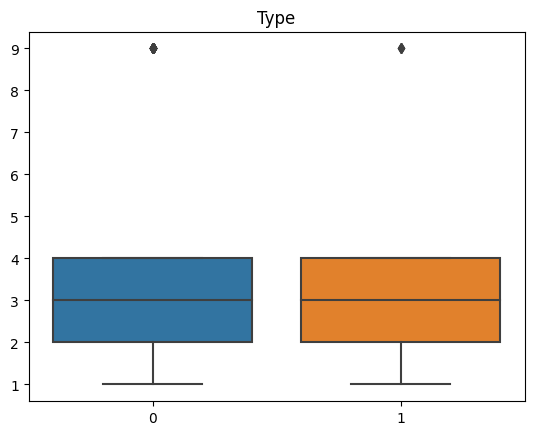

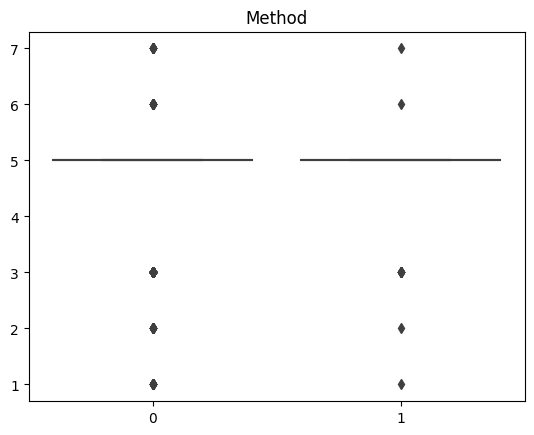

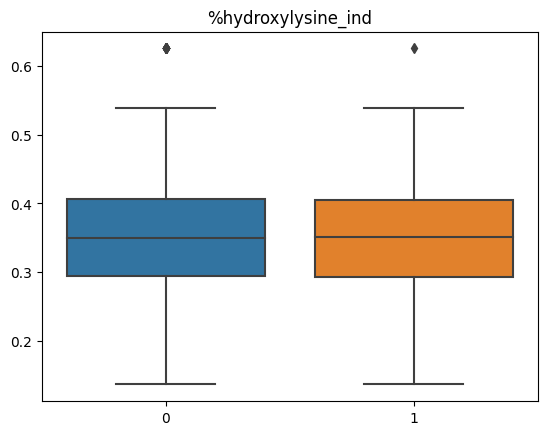

In [65]:
for c in df_final.columns:
  plt.figure()
  plt.title(c)
  sns.boxplot(
    data=[df_empirical_simulated[c], df_final[c]])
  plt.show()

## Normality simulation